# New Section

Import necessary libraries

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
!pip install -Uqq ipdb
import ipdb

Import data

In [ ]:
#import propeller experimental data
data1 = pd.read_csv("/content/volume1_exp.csv")
data2 = pd.read_csv("/content/volume2_exp.csv")
data3 = pd.read_csv("/content/volume3_exp.csv")

data1.head(20)


,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000,0.0993,0.0539,0.304
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000,0.0947,0.0543,0.374
2,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.255,4000,0.0916,0.0548,0.427
3,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.301,4000,0.0847,0.0540,0.473
4,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.340,4000,0.0796,0.0530,0.511
5,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.400,4000,0.0718,0.0504,0.570
6,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.438,4000,0.0659,0.0481,0.602
7,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.483,4000,0.0583,0.0451,0.625
8,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.531,4000,0.0497,0.0410,0.644
9,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.567,4000,0.0430,0.0372,0.655


Clean and organize data

In [ ]:
#extract solely values and concatenate all matrices into a single matrix
dataval1 = data1.iloc[:14231,3:11].values
dataval2 = data2.iloc[:3910,3:11].values
dataval3 = data3.iloc[:5451,3:11].values
#concat arrays together and separate input and output values
data = np.concatenate((dataval1,dataval2,dataval3))
geometry = data[:,0:5]
output = data[:,5:9]

#concat all dataframes
dataval = pd.concat([data1, data2, data3], ignore_index=True, axis=0)

## TRYING TO FIND AVERAGES OF EFFICIENCY BY ACCUMLUATING DATA
## OF MATCHING PROPELLER GEOMETRY AND AVERAGING THEM

#preallocate arrays for eta and prop geometries
size = dataval.shape[0]
etas = np.zeros((size,size))
sizes = np.zeros((size, 3))

#loop through each propeller for comparison
i = 0
while i < size:
  #store geometry values for comparison
  blades = dataval.iloc[i,3]
  diameter = dataval.iloc[i,4]
  pitch = dataval.iloc[i,5]
  sizes[i,0] = blades
  sizes[i,1] = diameter
  sizes[i,2] = pitch
  etas[i,0] = dataval.iloc[i,10]
  k = i + 1
  #loop through the rest of the data
  while k < size:
    #if geometries match comparison values
    if dataval.iloc[k,3] == blades and dataval.iloc[k,4] == diameter and dataval.iloc[k,5] == pitch:
      #input eta value into matrix row for matching propeller sizes
      etas[i,k] = dataval.iloc[k,10]
      #drop dataframe row
      dataval.drop(dataval.index[k], inplace=True)
      #alter loop values
      k = k - 1
      size = size - 1
    #alter loop values
    k = k + 1
  i = i + 1


Heatmap of the input data (B = # of blades, D = diameter, P = pitch, J = advanced ratio, N = RPM)

<Figure size 640x480 with 0 Axes>

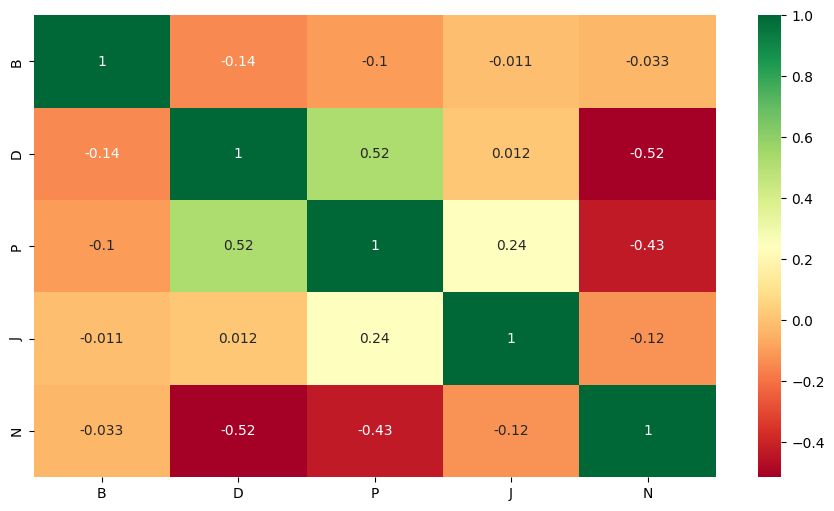

<Figure size 640x480 with 0 Axes>

In [ ]:
heat = pd.concat([data1.iloc[:14231,3:8], data2.iloc[:3910,3:8], data3.iloc[:5451,3:8]], ignore_index=True, axis=0)
plt.figure(figsize=(11,6))
p=sns.heatmap(heat.corr(), annot=True,cmap ='RdYlGn')
plt.figure()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Determine an efficiency classifier

In [ ]:
#remove all eta columns of all 0
etas = etas[:, ~np.all(etas == 0, axis=0)]
#remove all eta rows of all 0
etas = etas[~np.all(etas == 0, axis=1)]
#remove all geometry rows of all 0
sizes = sizes[~np.all(sizes == 0, axis=1)]

#pull maximum efficiency from each propeller geometry
max_eta = np.max(etas, axis = 1)
av_eta = np.average(max_eta)

#average of all maximum etas PERHAPS A BASELINE TO CLASSIFY PROPELLERS AS EFFICIENT OR NOT?!
print("Average efficiency = ",av_eta)

Average efficiency =  0.36262544354838705


Split data

In [ ]:
#split data into training and test set, with %20 for testing

geo_train, geo_test, output_train, output_test = train_test_split(geometry, output, test_size = .2)
train_samples=len(geo_train)
test_samples=len(geo_test)

#individualized output variables
thrust_train = output_train[:,0]
thrust_test = output_test[:,0]

power_train = output_train[:,1]
power_test = output_test[:,1]

eff_train = output_train[:,2]
eff_test = output_test[:,2]

Linear Regression Model

In [ ]:
#create linear regression instance
lin_reg = LinearRegression()

## MULTIVARIATE OUTPUT
lin_reg.fit(geo_train, output_train)
# get output prediction
output_hat=lin_reg.predict(geo_train)

# determine r2 score
print("Total R2 score = " + str(r2_score(output_train, output_hat)))

# get predicted values from test data
output_hat_val= lin_reg.predict(geo_test)

# determine cost from mean square cost function
cost_train=np.mean((output_train-output_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((output_test-output_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)


##INDIVIDUAL THRUST
lin_reg.fit(geo_train, thrust_train)
# get output prediction
thrust_hat=lin_reg.predict(geo_train)

# determine r2 score
print("\nThrust R2 score = " + str(r2_score(thrust_train, thrust_hat)))

# get predicted values from test data
thrust_hat_val= lin_reg.predict(geo_test)

# determine cost from mean square cost function
cost_train=np.mean((thrust_train-thrust_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((thrust_test-thrust_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)


##INDIVIDUAL POWER
lin_reg.fit(geo_train, power_train)
# get output prediction
power_hat=lin_reg.predict(geo_train)

# determine r2 score
print("\nPower R2 score = " + str(r2_score(power_train, power_hat)))

# get predicted values from test data
power_hat_val= lin_reg.predict(geo_test)

# determine cost from mean square cost function
cost_train=np.mean((power_train-power_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((power_test-power_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)


##INDIVIDUAL EFFICIENCY
lin_reg.fit(geo_train, eff_train)
# get output prediction
eff_hat=lin_reg.predict(geo_train)

# determine r2 score
print("\nEfficiency R2 score = " + str(r2_score(eff_train, eff_hat)))

# get predicted values from test data
eff_hat_val= lin_reg.predict(geo_test)

# determine cost from mean square cost function
cost_train=np.mean((eff_train-eff_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((eff_test-eff_hat_val)**2)/test_samples
print("Validation Loss:",cost_val)

Total R2 score = 0.4515410141837835
training loss:  5.160435803714841e-06
Validation Loss: 1.8034704018685333e-05

Thrust R2 score = 0.7208354795620981
training loss:  2.543627159675203e-08
Validation Loss: 1.0436497547716235e-07

Power R2 score = 0.5231280622912496
training loss:  1.6432532021031436e-08
Validation Loss: 6.658773091848398e-08

Efficiency R2 score = 0.11065950069801045
training loss:  1.5439438607526735e-05
Validation Loss: 5.393315934966036e-05


Polynomial Regression Model

In [ ]:
## MULTIVARIATE OUTPUT
#create polynomial feature of 3rd degree
poly_reg = PolynomialFeatures(degree = 3)
# get constants for each degree
geo_poly = poly_reg.fit_transform(geo_train)
#create multivariate linear regression and fit data
lin_reg_2 = LinearRegression()
lin_reg_2.fit(geo_poly, output_train)
# get output prediction
output_hat=lin_reg_2.predict(geo_poly)

# determine r2 score
print("Multi-output R2 score = " + str(r2_score(output_train, output_hat)))

# get predicted values from test data
geo_test_poly=poly_reg.fit_transform(geo_test)
output_hat_val= lin_reg_2.predict(geo_test_poly)

# determine cost from mean square cost function
cost_train=np.mean((output_train-output_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((output_test-output_hat_val)**2)/test_samples
print("Validation Loss: ",cost_val)


## THRUST OUTPUT
#create polynomial feature of 3rd degree
poly_reg = PolynomialFeatures(degree = 3)
# get constants for each degree
geo_poly = poly_reg.fit_transform(geo_train)
#create multivariate linear regression and fit data
lin_reg_2 = LinearRegression()
lin_reg_2.fit(geo_poly, thrust_train)
# get output prediction
thrust_hat=lin_reg_2.predict(geo_poly)

# determine r2 score
print("\nThrust R2 score = " + str(r2_score(thrust_train, thrust_hat)))

# get predicted values from test data
geo_test_poly=poly_reg.fit_transform(geo_test)
thrust_hat_val= lin_reg_2.predict(geo_test_poly)

# determine cost from mean square cost function
cost_train=np.mean((thrust_train-thrust_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((thrust_test-thrust_hat_val)**2)/test_samples
print("Validation Loss: ",cost_val)



## POWER OUTPUT
#create polynomial feature of 3rd degree
poly_reg = PolynomialFeatures(degree = 3)
# get constants for each degree
geo_poly = poly_reg.fit_transform(geo_train)
#create multivariate linear regression and fit data
lin_reg_2 = LinearRegression()
lin_reg_2.fit(geo_poly, power_train)
# get output prediction
power_hat=lin_reg_2.predict(geo_poly)

# determine r2 score
print("\nPower R2 score = " + str(r2_score(power_train, power_hat)))

# get predicted values from test data
geo_test_poly=poly_reg.fit_transform(geo_test)
power_hat_val= lin_reg_2.predict(geo_test_poly)

# determine cost from mean square cost function
cost_train=np.mean((power_train-power_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((power_test-power_hat_val)**2)/test_samples
print("Validation Loss: ",cost_val)


## EFFICIENCY OUTPUT
#create polynomial feature of 3rd degree
poly_reg = PolynomialFeatures(degree = 3)
# get constants for each degree
geo_poly = poly_reg.fit_transform(geo_train)
#create multivariate linear regression and fit data
lin_reg_2 = LinearRegression()
lin_reg_2.fit(geo_poly, eff_train)
# get output prediction
eff_hat=lin_reg_2.predict(geo_poly)

# determine r2 score
print("\nEfficiency R2 score = " + str(r2_score(eff_train, eff_hat)))

# get predicted values from test data
geo_test_poly=poly_reg.fit_transform(geo_test)
eff_hat_val= lin_reg_2.predict(geo_test_poly)

# determine cost from mean square cost function
cost_train=np.mean((eff_train-eff_hat)**2)/train_samples
print("training loss: ",cost_train)

cost_val=np.mean((eff_test-eff_hat_val)**2)/test_samples
print("Validation Loss: ",cost_val,"\n")


Multi-output R2 score = 0.7137802043136675
training loss:  3.0737651507409735e-06
Validation Loss:  1.1264187138527074e-05

Thrust R2 score = 0.8766229247804018
training loss:  1.1241588971176895e-08
Validation Loss:  4.597521466050123e-08

Power R2 score = 0.7948267526005243
training loss:  7.07006575801079e-09
Validation Loss:  2.8630263824126586e-08

Efficiency R2 score = 0.4698909454213982
training loss:  9.202983795165227e-06
Validation Loss:  3.371798401138622e-05 



Logistic Regression Model for Efficiency

The data is biased towards efficiency predictions due to the much higher number of efficient classifications
Predicted Class:  [1.]
True Class:  0.0
Efficiency Accuracy:  0.7128628946810766


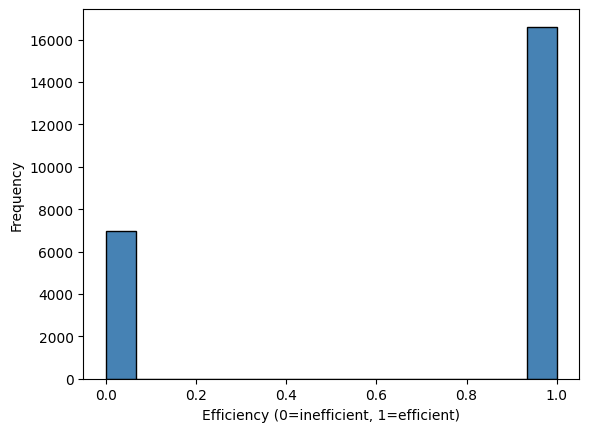

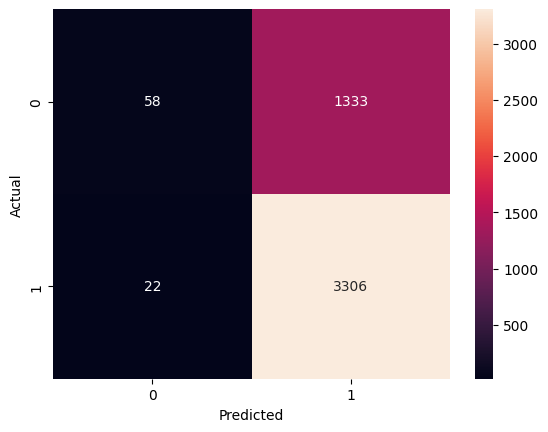

              precision    recall  f1-score   support

         0.0       0.72      0.04      0.08      1391
         1.0       0.71      0.99      0.83      3328

    accuracy                           0.71      4719
   macro avg       0.72      0.52      0.45      4719
weighted avg       0.72      0.71      0.61      4719



In [ ]:
#create logistic regression instance
log_reg = LogisticRegression(penalty="l2", C=1, fit_intercept=True, max_iter=1000)

#transform efficiency values into discrete 0(not efficient) and 1(efficient) values
dataval = pd.concat([data1.iloc[:14231,3:11], data2.iloc[:3910,3:11], data3.iloc[:5451,3:11]], ignore_index=True, axis=0)
dataval.loc[dataval.eta <= av_eta, "eta"] = 0
dataval.loc[dataval.eta > av_eta, "eta"] = 1

#visualize efficiencies for bias analysis
plt.xlabel("Efficiency (0=inefficient, 1=efficient)")
plt.ylabel("Frequency")
freq, bins, patches = plt.hist(dataval['eta'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
print("The data is biased towards efficiency predictions due to the much higher number of efficient classifications")
plt.figure()

#separate output variable
y = dataval.iloc[:,7].values

#train model
geo_train, geo_test, y_train, y_test = train_test_split(geometry, y, test_size = .2)

#train and predict model
log_reg.fit(geo_train, y_train)
eta_hat = log_reg.predict(geo_test)

#select value to test model
t=geo_test[0]
#print out prediction
print("Predicted Class: ",log_reg.predict(t.reshape(1,-1)))
print("True Class: ",y_test[0])

# evaluate model accuracy
print("Efficiency Accuracy: ", accuracy_score(y_test, eta_hat))

#confusion matrix
conf_mat = confusion_matrix(y_test, eta_hat)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, eta_hat))

Naves Bayes Predictive Model

Predicted Class:  [0.]
True Class:  1.0
Efficiency Accuracy:  0.6696333969061242


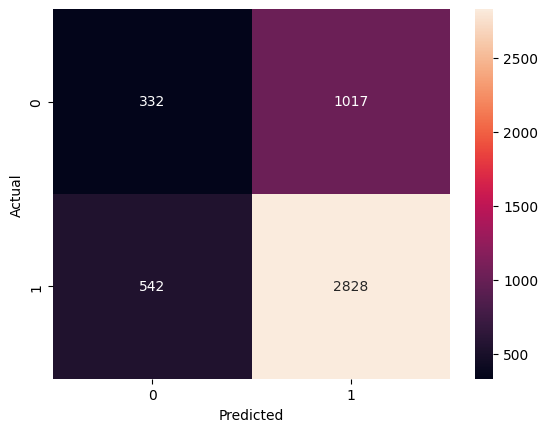

              precision    recall  f1-score   support

         0.0       0.38      0.25      0.30      1349
         1.0       0.74      0.84      0.78      3370

    accuracy                           0.67      4719
   macro avg       0.56      0.54      0.54      4719
weighted avg       0.63      0.67      0.65      4719



In [ ]:
#create an instance of MultinomialNB class
model=MultinomialNB()

#fit the training data for efficiency
model.fit(geo_train, y_train)

#get the predicted labels for test data
eff_hat = model.predict(geo_test)

#select value to test model
t=geo_test[0]
#print out prediction
print("Predicted Class: ",model.predict(t.reshape(1,-1)))
print("True Class: ",y_test[0])

# evaluate model accuracy
print("Efficiency Accuracy: ", accuracy_score(y_test, eff_hat))

#confusion matrix
conf_mat = confusion_matrix(y_test, eff_hat)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, eff_hat))

K Nearest Neighbors Model

Text(0, 0.5, 'Accuracy')

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

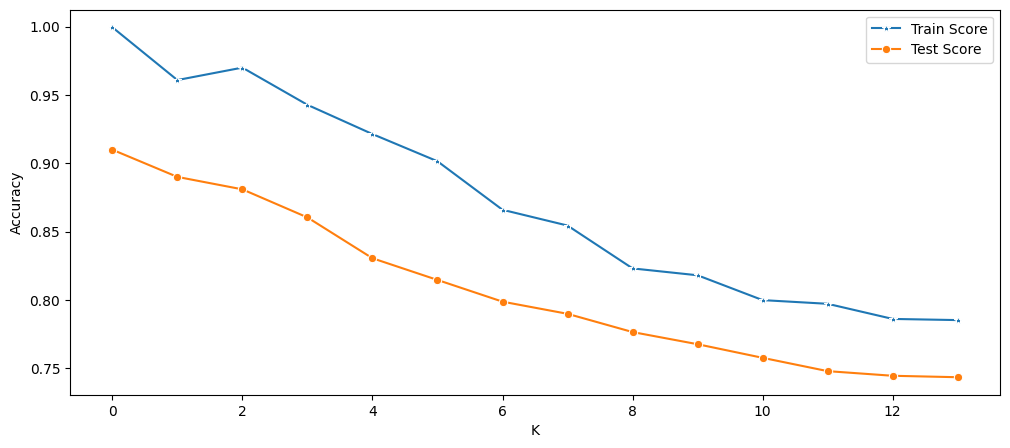

In [ ]:
#standardize inputs
geometrys_std = (geometry-geometry.mean())/(geometry.std())

#split into train and test data
X_train,X_test,y_train,y_test = train_test_split(geometrys_std,y,test_size=.2,random_state=42)

test_scores = []
train_scores = []

#run this for loop to find the best k value
for i in range(1,15):
    #for the current loop assign k=i
    knn = KNeighborsClassifier(i)
    #the training data
    knn.fit(X_train,y_train)
    #predict the class label for the training data
    pred_y_train=knn.predict(X_train)
    #get the training accuracy
    train_accuracy=accuracy_score(pred_y_train,y_train)
    #append the training accuracy at a particular k value to the list.
    train_scores.append(train_accuracy)

    #predict the class label for test data
    pred_y_test=knn.predict(X_test)
    #get the test accuracy
    test_accuracy=accuracy_score(pred_y_test,y_test)
    #append the test accuracy at a particular k value to the list.
    test_scores.append(test_accuracy)

    plt.figure(figsize=(12,5))

#plot data
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')
plt.xlabel("K")
plt.ylabel("Accuracy")

KNN Prediction Model with Chosen Neighbors

Predicted Class:  [1.]
True Class:  0.0


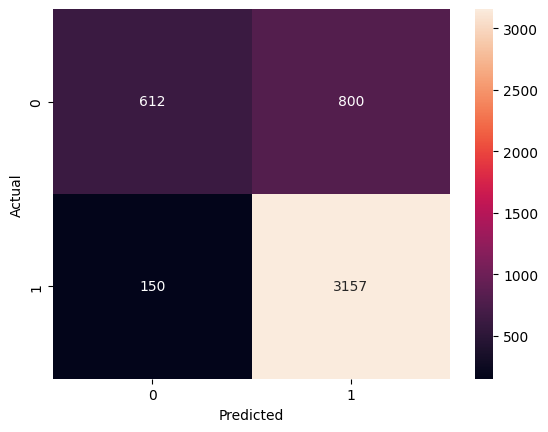

              precision    recall  f1-score   support

         0.0       0.80      0.43      0.56      1412
         1.0       0.80      0.95      0.87      3307

    accuracy                           0.80      4719
   macro avg       0.80      0.69      0.72      4719
weighted avg       0.80      0.80      0.78      4719



In [ ]:
#Choose 7 neighbors from graph
knn = KNeighborsClassifier(7)

#train model
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#select value to test model
t=X_test[0]
#print out prediction
print("Predicted Class: ",knn.predict(t.reshape(1,-1)))
print("True Class: ",y_test[0])
#generate predicted values from model
y_pred = knn.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred))